# Lesson 3: Mastering K-means Clustering and the Rand Index with Python

# Introduction and Overview
Welcome back! In this lesson, we're seeking a more in-depth understanding of the K-means clustering algorithm by using a straightforward 2D dataset. We'll explore its implementation and evaluate its performance using a well-known measure of clustering accuracy: the Rand Index.

---

## Understanding the Rand Index
As we progress, we delve into the Rand Index, an external cluster validation measure that determines the similarity between two clustering structures. The Rand Index accounts for all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clustering.

\[
RI = \frac{TP + TN}{TP + FP + FN + TN}
\]

Where:

- **TP (True Positive)** is the number of data pairs that are in the same group for both true and predicted labels.  
- **FP (False Positive)** is the number of data pairs that are in the same group for predicted labels but not the true labels.  
- **FN (False Negative)** is the number of data pairs that are in the same group for the true labels but not in the predicted labels.  
- **TN (True Negative)** is the number of data pairs that are in different groups for both true and predicted labels.  

The Rand Index value will be between 0 (indicating that the clusters are completely dissimilar) and 1 (indicating that the clusters are identical). As mentioned earlier, the Rand Index can sometimes be overly optimistic, predicting random labels. Despite this, it remains a valuable tool for providing an objective evaluation of our K-means algorithm's performance.

---

## Rand Index vs Adjusted Rand Score
Now, let's discuss an important distinction: the difference between the Rand Index and the Adjusted Rand Score. While the Rand Index gives an absolute measure of the similarity between two data samples, it doesn't take into account the chance groupings that might occur. In other words, the Rand Index may yield a high value due to randomness in the dataset, which is certainly not how we want to evaluate the performance of our algorithm.

The Adjusted Rand Score corrects the Rand Index by taking into account the expected similarity of two random data samples. The Adjusted Rand Score is given by:

\[
ARI = \frac{RI - Expected\_RI}{Max\_RI - Expected\_RI}
\]

Where:

- **RI** is the Rand Index of the dataset.  
- **Expected_RI** is the expected RI on a set of random clusters.  
- **Max_RI** is the maximum possible value of the RI.  

A high Adjusted Rand Score shows that the clustering is not due to randomness, but due to a meaningful grouping in the dataset. The Adjusted Rand Score, therefore, provides a more robust measure for comparing different clustering algorithms.

While both metrics serve the purpose of comparing two data clusters, always remember:
1. Rand Index may give a high score due to chance groupings.  
2. Adjusted Rand Score accounts for the chance groupings, providing a score that truly reflects the similarity between the two clusters.

---

## Evaluating K-means with the Adjusted Rand Score using sklearn
Now that we have learned about the Rand Index and Adjusted Rand Score, it's beneficial to familiarize ourselves with some libraries that provide similar functionality. **sklearn**, short for **Scikit-learn**, is a free machine learning library for Python. It features various algorithms like support vector machines, random forests, and k-nearest neighbors, and it also supports Python numerical and scientific libraries like NumPy and SciPy.

In sklearn, the function `adjusted_rand_score` computes the Adjusted Rand Score of a clustering result. Let's modify our code to use this function:

```python
from sklearn import metrics

# Calculate the Adjusted Rand Score using sklearn's function
ri = metrics.adjusted_rand_score(true_labels, labels)

print("Adjusted Rand Score using sklearn function: ", ri)
```

In the above snippet, we import `metrics` from sklearn and use `adjusted_rand_score` to compute the Adjusted Rand Score. The inputs to the function are the true labels and the labels predicted by K-means. The function returns a floating-point number representing the Adjusted Rand Score of the predicted clusters. Just like in Rand Index calculation, a higher Adjusted Rand Score means that our K-means algorithm has done a great job clustering.

---

## Full Implementation: K-means and Evaluating with the Adjusted Rand Score using sklearn

With all the pieces at hand, let's put everything together. We'll perform K-means clustering on our toy dataset using sklearn's `KMeans` function, then evaluate the results using the Adjusted Rand Score from sklearn. Here's how to do that:

First, we initialize the data and perform clustering:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
np.random.seed(42)

# Define a 2D dataset and true labels for assessment
features = np.array([
    [1, 1], [1, 2], [2, 1], [2, 2], 
    [5, 5], [5, 6], [6, 5], [6, 6], 
    [9, 9], [9, 10], [10, 9], [10, 10],
    [10, 2], [10, 3], [11, 2], [11, 3], 
    [4, 8], [4, 9], [5, 8], [5, 9], 
    [3, 5], [3, 6], [3, 5], [3, 6]
])
true_labels = np.array([
    0, 0, 0, 0, 1, 1, 1, 1,
    2, 2, 2, 2, 0, 0, 0, 0,
    1, 1, 1, 1, 2, 2, 2, 2
])

# Define the K-means algorithm and fit the model to the data
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(features)
```

Next, let's calculate the Adjusted Rand Score using sklearn:

```python
# Obtain the labels
labels = kmeans.labels_

# Calculate the Adjusted Rand Score using sklearn
ri = adjusted_rand_score(true_labels, labels)

# Output the resulting cluster labels, centroids and Adjusted Rand Score
print("Cluster labels: ", labels)
print("Centroids: ", kmeans.cluster_centers_)  # e.g., [[3.0 4.0], [10.5 2.5], [6.8 8.6]]
print("Adjusted Rand Score: ", ri)  # e.g., ~ 0.12

# Visualizing the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.title("Clusters with Centroids (Red)")
plt.show()
```

Here, we have effectively encapsulated our prior discussions on implementing K-means clustering, applying the Adjusted Rand Score, and bringing the insights to life through visual representations. Sklearn's `KMeans` function simplifies the K-means process into merely defining the model, fitting it to the data, and performing evaluations. By reflecting this streamlined process, the code highlights the importance of understanding essential concepts, navigating libraries, and connecting functions to their origins.

---

## Lesson Summary and Practice
The exploration of the K-means algorithm and the proper use of the Rand Index and Adjusted Rand Score has provided us with significant insights in the realm of machine learning. The next phase will involve practical applications, cementing your understanding of these crucial concepts. Your understanding of these concepts, like the K-means algorithm that we discussed, will improve through multiple iterations. Happy practicing!

## Visualizing Clusters with K-Means and Rand Index Evaluation

Take a look at the K-means clustering results on the Iris dataset. This process involves the automatic grouping of similar data points. The provided code executes this clustering and calculates the Adjusted Rand Score. Click Run to see the computed result for the Adjusted Rand Score.

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
features = iris.data

# Apply K-means clustering to the Iris dataset
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(features)

# Assign labels to each point
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the Rand Index to assess the performance of K-means
rand_index = adjusted_rand_score(iris.target, labels)
print(f"The Rand Index of the clustering is: {rand_index}")

# Visualize clusters and centroids
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.title("Iris data clusters with centroids (Red X)")  
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

```

The Rand Index of the clustering is: 0.7302382722834697


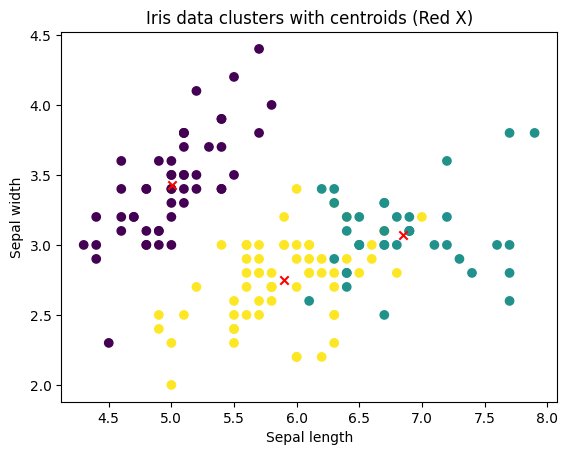

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
features = iris.data

# Apply K-means clustering to the Iris dataset
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(features)

# Assign labels to each point
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the Rand Index to assess the performance of K-means
rand_index = adjusted_rand_score(iris.target, labels)
print(f"The Rand Index of the clustering is: {rand_index}")

# Visualize clusters and centroids
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.title("Iris data clusters with centroids (Red X)")  
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

## Adjusting the Number of Clusters in KMeans

You're doing stellar work, Space Voyager! Are you ready to influence your KMeans cosmic dance? In the code, adjust the number of clusters from 3 to 2. Observe the resulting Rand Index to see how this change in the number of clusters affects the outcome. Onward to the edit!

```py
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
data = iris.data

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculating Rand Index
rand_index = adjusted_rand_score(iris.target, labels)

# Visualization
# Plotting the data with cluster labels for colors
plt.scatter(data[:, 0], data[:, 1], c=labels)
# Plotting the centroids in red
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.title("Clusters with Centroids (Red)")
plt.show()

# Displaying the Rand Index
print(f"Rand Index: {rand_index}")

```

To adjust the number of clusters in the KMeans algorithm from 3 to 2 and observe how this change affects the Rand Index, you'll need to modify the `n_clusters` parameter in the `KMeans` constructor. Let's make this adjustment and see the impact on the clustering outcome.

Here's the updated code with the number of clusters set to 2:

```python
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
data = iris.data

# Apply K-means clustering with 2 clusters instead of 3
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculating Rand Index
rand_index = adjusted_rand_score(iris.target, labels)

# Visualization
# Plotting the data with cluster labels for colors
plt.scatter(data[:, 0], data[:, 1], c=labels)
# Plotting the centroids in red
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)  # Enhanced visibility of centroids
plt.title("Clusters with Centroids (Red)")
plt.show()

# Displaying the Rand Index
print(f"Rand Index: {rand_index}")
```

### Key Changes:
1. **Number of Clusters**: The `n_clusters` parameter in the `KMeans` constructor is set to 2, reducing the number of clusters from the original 3. This change will likely affect the configuration of the clusters and, consequently, the Rand Index.
2. **Centroid Visualization**: I've added enhancements to the centroid visualization (`marker='X'`, `s=100`) to make them more distinct in the plot.

### Expected Outcome:
- **Rand Index**: Changing the number of clusters will alter the Rand Index value. The Rand Index measures the similarity between the true labels and those predicted by the clustering. Since the Iris dataset naturally has three classes, reducing the number of clusters to 2 might lower the Rand Index, indicating a poorer match between the cluster assignments and the actual class labels.
- **Visualization**: The plot will show how the data is divided into two clusters instead of three, which might provide less accurate but still interesting insights into the data structure.

This adjustment provides a simple way to explore the sensitivity of clustering outcomes to the choice of the number of clusters and demonstrates the flexibility of the KMeans algorithm.

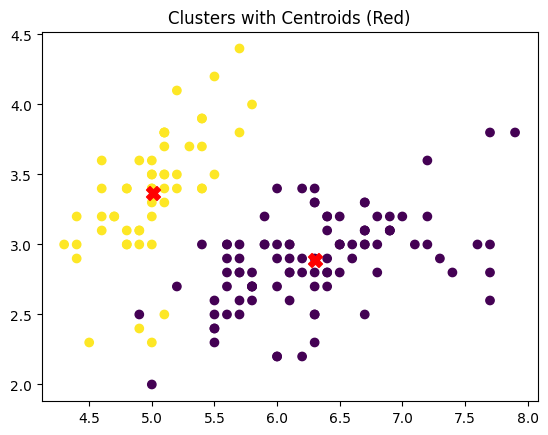

Rand Index: 0.5399218294207123


In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
data = iris.data

# Apply K-means clustering with 2 clusters instead of 3
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculating Rand Index
rand_index = adjusted_rand_score(iris.target, labels)

# Visualization
# Plotting the data with cluster labels for colors
plt.scatter(data[:, 0], data[:, 1], c=labels)
# Plotting the centroids in red
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)  # Enhanced visibility of centroids
plt.title("Clusters with Centroids (Red)")
plt.show()

# Displaying the Rand Index
print(f"Rand Index: {rand_index}")


## Measuring the Cluster Performance

Well done, Space Voyager! Your mission now is to fill in the blanks to calculate a crucial metric that assesses our K-means clustering performance. Seek out the appropriate sklearn function and make it so!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
features = iris.data

# The true labels of the dataset
true_labels = iris.target

# Define the K-means algorithm
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(features)

# Obtain the labels
labels = kmeans.labels_

# TODO: Calculate and print the metric that evaluates the similarity between the true labels and the labels found by K-means

# Visualizing the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels)
# TODO: Create a scatter plot of the cluster centers with red 'x' markers
plt.title("Clusters with Centroids (Red Cross)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

```

To complete your mission of assessing the K-means clustering performance, you need to calculate a metric that evaluates the similarity between the true labels and the labels found by K-means. As you've already imported `adjusted_rand_score`, which is an excellent metric for this purpose, you can use it to compute the similarity.

Additionally, you'll need to add a scatter plot for the cluster centers with red 'x' markers to visualize the centroids. Here's the completed code:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
features = iris.data

# The true labels of the dataset
true_labels = iris.target

# Define the K-means algorithm
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(features)

# Obtain the labels
labels = kmeans.labels_

# Calculate and print the metric that evaluates the similarity between the true labels and the labels found by K-means
print("Adjusted Rand Score:", adjusted_rand_score(true_labels, labels))

# Visualizing the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels)
# Create a scatter plot of the cluster centers with red 'x' markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title("Clusters with Centroids (Red Cross)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
```

### Key Components:
- **Adjusted Rand Score**: This function computes the Adjusted Rand Index, which is a measure of the similarity between two data clusterings. A higher score indicates better clustering performance, with a score of 1 indicating perfect agreement. This metric is particularly useful as it adjusts for the chance grouping of elements, providing a more reliable measure of the actual clustering effectiveness.
- **Visualization of Cluster Centers**: The scatter plot for the cluster centers uses red 'x' markers (`marker='x'`, `c='red'`, `s=100`) to clearly distinguish them from the data points. This visualization helps in assessing the positioning of the centroids relative to the clusters.

This setup effectively evaluates the clustering performance and visually confirms the clustering results, providing a comprehensive view of how well the K-means algorithm has performed on the Iris dataset with the chosen number of clusters.

Adjusted Rand Score: 0.5399218294207123


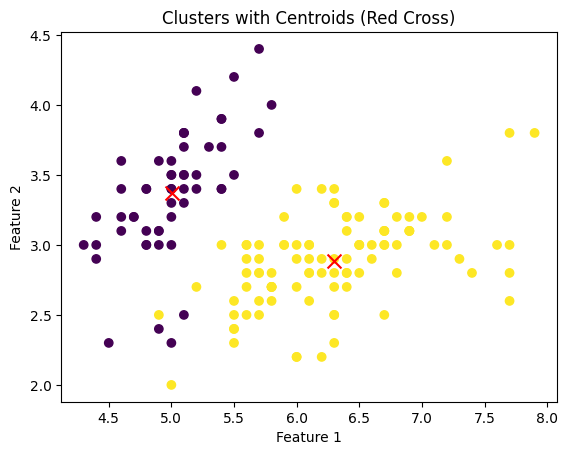

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
features = iris.data

# The true labels of the dataset
true_labels = iris.target

# Define the K-means algorithm
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(features)

# Obtain the labels
labels = kmeans.labels_

# Calculate and print the metric that evaluates the similarity between the true labels and the labels found by K-means
print("Adjusted Rand Score:", adjusted_rand_score(true_labels, labels))

# Visualizing the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels)
# Create a scatter plot of the cluster centers with red 'x' markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title("Clusters with Centroids (Red Cross)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
